In [1]:
import os
import sys

import pandas as pd
import geopandas as gpd

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aup

In [2]:
m = '01001'

gdf = aup.gdf_from_db("mpos_2020", "marco")
mun_gdf = gdf.loc[gdf.CVEGEO == m]

In [3]:
m = '01001'
query = f"SELECT * FROM hexgrid.hex_grid WHERE \"CVEGEO\" LIKE \'{m}%%\'"
hex_bins = aup.gdf_from_query(query, geometry_col='geometry')
hex_bins.head(2)

,geometry,hex_id_8,CVEGEO
0,"POLYGON ((-102.31835 21.82096, -102.31376 21.8...",88498eacd7fffff,01001
1,"POLYGON ((-102.11473 21.78362, -102.11014 21.7...",88498e3205fffff,01001


<AxesSubplot:>

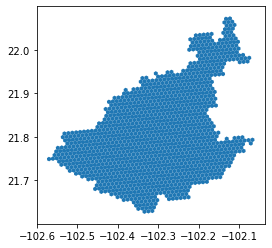

In [4]:
hex_bins.plot()

In [5]:
# Reads mun_gdf GeoDataFrame as polygon
poly = mun_gdf.geometry
# Extracts coordinates from polygon as DataFrame
coord_val = poly.bounds
# Gets coordinates for bounding box
n = coord_val.maxy.max()
s = coord_val.miny.min()
e = coord_val.maxx.max()
w = coord_val.minx.min()

In [6]:
query = f"SELECT * FROM osmnx_new.nodes WHERE (\"x\" between \'{w}\' and \'{e}\') and (\"y\" between \'{s}\' and \'{n}\')"
nodes = aup.gdf_from_query(query, geometry_col='geometry')
nodes.head(2)

,osmid,x,y,street_count,geometry
0,8727742687,-102.114422,21.663346,1,POINT (-102.11442 21.66335)
1,8728228164,-102.319807,21.725714,3,POINT (-102.31981 21.72571)


<AxesSubplot:>

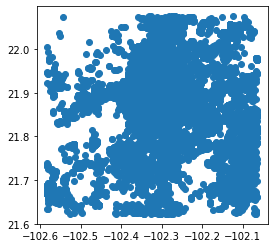

In [7]:
nodes.plot()

In [9]:
query = f"SELECT * FROM censoageb.censoageb_2020 WHERE \"cve_geo\" LIKE \'{m}%%\'"
ageb_gdf = aup.gdf_from_query(query, geometry_col='geometry')
ageb_gdf.head(2)

,cve_geo,cve_ent,cve_mun,cve_loc,cve_ageb,geometry,entidad,nom_ent,mun,nom_mun,...,vph_cel,vph_inter,vph_stvp,vph_spmvpi,vph_cvj,vph_sinrtv,vph_sintlc,vph_sincint,vph_sintic,cve_geo_ageb
0,010010001216A,01,001,0001,216A,"POLYGON ((-102.27058 21.87363, -102.27083 21.8...",1,Aguascalientes,1,Aguascalientes,...,753.0,609.0,439.0,205.0,146.0,7.0,14.0,174.0,NaN,010010001216A
1,0100100012649,01,001,0001,2649,"POLYGON ((-102.24857 21.86557, -102.24870 21.8...",1,Aguascalientes,1,Aguascalientes,...,897.0,718.0,549.0,217.0,172.0,5.0,23.0,176.0,NaN,0100100012649


<AxesSubplot:>

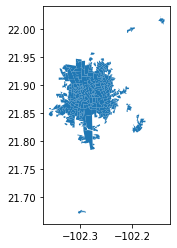

In [10]:
ageb_gdf.plot()

In [84]:
nodes_pop = aup.population_to_nodes(nodes, ageb_gdf, column_start=14, column_end=-2, cve_column='cve_geo')
nodes_pop.drop('index_right', axis=1, inplace=True)
nodes_pop.head(2)

,osmid,x,y,street_count,geometry,cve_geo,cve_ent,cve_mun,cve_loc,cve_ageb,...,vph_cel,vph_inter,vph_stvp,vph_spmvpi,vph_cvj,vph_sinrtv,vph_sintlc,vph_sincint,vph_sintic,cve_geo_ageb
126,8740451940,-102.321692,21.842858,3,POINT (-102.32169 21.84286),0100100014147,01,001,0001,4147,...,5.291667,4.883333,2.516667,3.291667,2.2,0.025,0.075,0.258333,0.0,0100100014147
127,8740451945,-102.321011,21.840569,3,POINT (-102.32101 21.84057),0100100014147,01,001,0001,4147,...,5.291667,4.883333,2.516667,3.291667,2.2,0.025,0.075,0.258333,0.0,0100100014147


In [90]:
hex_temp = gpd.sjoin(nodes_pop, hex_bins)
hex_temp.head(5)

,osmid,x,y,street_count,geometry,cve_geo,cve_ent,cve_mun,cve_loc,cve_ageb,...,vph_spmvpi,vph_cvj,vph_sinrtv,vph_sintlc,vph_sincint,vph_sintic,cve_geo_ageb,index_right,hex_id_8,CVEGEO
126,8740451940,-102.321692,21.842858,3,POINT (-102.32169 21.84286),0100100014147,01,001,0001,4147,...,3.291667,2.2,0.025,0.075,0.258333,0.0,0100100014147,318,88498eac91fffff,01001
127,8740451945,-102.321011,21.840569,3,POINT (-102.32101 21.84057),0100100014147,01,001,0001,4147,...,3.291667,2.2,0.025,0.075,0.258333,0.0,0100100014147,318,88498eac91fffff,01001
128,8740451952,-102.321478,21.841735,3,POINT (-102.32148 21.84174),0100100014147,01,001,0001,4147,...,3.291667,2.2,0.025,0.075,0.258333,0.0,0100100014147,318,88498eac91fffff,01001
487,1248700487,-102.323196,21.843213,4,POINT (-102.32320 21.84321),0100100014147,01,001,0001,4147,...,3.291667,2.2,0.025,0.075,0.258333,0.0,0100100014147,318,88498eac91fffff,01001
1086,2311966120,-102.323588,21.843252,3,POINT (-102.32359 21.84325),0100100014147,01,001,0001,4147,...,3.291667,2.2,0.025,0.075,0.258333,0.0,0100100014147,318,88498eac91fffff,01001


In [96]:
resolution = 8
hex_temp = hex_temp.groupby(f'hex_id_{resolution}').sum()
hex_temp2 = hex_temp[ageb_gdf.iloc[:,14:-1].columns.to_list()]
hex_temp2.head(5)

,pobtot,pobfem,pobmas,p_0a2,p_0a2_f,p_0a2_m,p_3ymas,p_3ymas_f,p_3ymas_m,p_5ymas,...,vph_telef,vph_cel,vph_inter,vph_stvp,vph_spmvpi,vph_cvj,vph_sinrtv,vph_sintlc,vph_sincint,vph_sintic
hex_id_8,,,,,,,,,,,,,,,,,,,,,
884988d901fffff,2981.449010,1540.707832,1440.741178,130.734348,64.848937,65.885411,2850.714663,1475.858895,1374.855767,2744.498803,...,484.915860,848.027248,717.212085,423.215836,477.100342,319.509421,5.882026,7.642045,103.707576,0.000000
884988d903fffff,759.161290,392.365591,366.795699,50.698925,24.247312,26.451613,708.462366,368.118280,340.344086,674.516129,...,102.279570,242.473118,213.376344,126.086022,158.709677,102.279570,2.645161,0.000000,13.666667,0.000000
884988d905fffff,4125.314835,2085.581890,2039.732945,260.557320,120.837987,139.719333,3864.757516,1964.743903,1900.013613,3698.071141,...,517.401168,1279.382367,1127.360776,536.794445,773.994055,473.020236,11.816434,13.216558,138.396963,0.035714
884988d907fffff,1440.573987,731.753735,708.820252,66.664626,33.200000,33.464626,1373.909361,698.553735,675.355626,1319.512331,...,168.639874,376.026103,273.786409,144.874347,147.317012,95.540594,3.827183,9.818182,100.985419,0.000000
884988d90bfffff,185.161290,95.698925,89.462366,12.365591,5.913978,6.451613,172.795699,89.784946,83.010753,164.516129,...,24.946237,59.139785,52.043011,30.752688,38.709677,24.946237,0.645161,0.000000,3.333333,0.000000


In [71]:
temp_oneline = temp[temp.iloc[:, 14:-2].columns.to_list()] / (temp.nodes_in.values.reshape((-1,1)))
temp_oneline

,pobtot,pobfem,pobmas,p_0a2,p_0a2_f,p_0a2_m,p_3ymas,p_3ymas_f,p_3ymas_m,p_5ymas,...,vph_telef,vph_cel,vph_inter,vph_stvp,vph_spmvpi,vph_cvj,vph_sinrtv,vph_sintlc,vph_sincint,vph_sintic
0,28.265957,15.361702,12.904255,1.191489,0.648936,0.542553,27.074468,14.712766,12.361702,26.361702,...,4.202128,8.010638,6.478723,4.670213,2.180851,1.553191,0.074468,0.148936,1.851064,NaN
1,36.935484,19.172043,17.763441,1.408602,0.688172,0.720430,35.526882,18.483871,17.043011,34.354839,...,5.311828,9.645161,7.720430,5.903226,2.333333,1.849462,0.053763,0.247312,1.892473,NaN
2,153.062500,77.875000,75.187500,9.437500,4.312500,5.125000,143.625000,73.562500,70.062500,136.937500,...,11.375000,37.500000,22.562500,17.812500,7.750000,9.937500,NaN,0.875000,13.250000,0.00000
3,55.265625,28.578125,26.687500,1.750000,0.859375,0.890625,53.515625,27.718750,25.796875,52.343750,...,11.843750,16.281250,14.531250,10.375000,8.500000,4.859375,0.125000,0.156250,1.812500,NaN
4,26.655738,14.213115,12.442623,0.524590,0.213115,0.311475,26.114754,14.000000,12.114754,25.688525,...,5.770492,7.950820,7.163934,5.819672,3.836066,1.967213,0.049180,0.049180,1.147541,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,73.641509,36.245283,37.396226,4.169811,2.132075,2.037736,69.471698,34.113208,35.358491,66.471698,...,8.509434,20.792453,13.830189,11.320755,5.490566,4.660377,0.264151,0.433962,5.603774,0.09434
328,26.640000,13.813333,12.826667,1.613333,0.920000,0.693333,25.026667,12.893333,12.133333,24.120000,...,0.786667,5.626667,3.120000,2.480000,0.426667,0.653333,0.120000,0.453333,2.960000,0.04000
329,12.044776,6.000000,6.044776,0.776119,0.432836,0.343284,11.268657,5.567164,5.701493,10.776119,...,0.059701,2.582090,1.029851,1.104478,0.164179,0.283582,0.044776,0.164179,1.597015,NaN
330,26.333333,13.421053,12.912281,1.631579,0.894737,0.736842,24.701754,12.526316,12.175439,23.385965,...,0.912281,5.035088,2.157895,1.052632,0.473684,0.228070,0.122807,0.438596,3.298246,NaN


In [105]:
totals = gpd.sjoin(nodes, ageb_gdf).groupby('cve_geo').count().rename(columns={'x': 'nodes_in'})[['nodes_in']].reset_index()  # caluculate the totals# get a temporal dataframe with the totals and columns
temp = pd.merge(ageb_gdf, totals, on='cve_geo')
for col in temp.columns.tolist()[14:-2]:  # get the average for the values
    temp[col] = temp[col]/temp['nodes_in']
nodes_pop = gpd.sjoin(nodes, temp)

In [106]:
nodes_pop.drop(['nodes_in','index_right'], axis=1, inplace=True)

In [101]:
temp

,cve_geo,cve_ent,cve_mun,cve_loc,cve_ageb,geometry,entidad,nom_ent,mun,nom_mun,...,vph_cel,vph_inter,vph_stvp,vph_spmvpi,vph_cvj,vph_sinrtv,vph_sintlc,vph_sincint,vph_sintic,cve_geo_ageb
0,010010001216A,01,001,0001,216A,"POLYGON ((-102.27058 21.87363, -102.27083 21.8...",1,Aguascalientes,1,Aguascalientes,...,8.010638,6.478723,4.670213,2.180851,1.553191,0.074468,0.148936,1.851064,NaN,010010001216A
1,0100100012649,01,001,0001,2649,"POLYGON ((-102.24857 21.86557, -102.24870 21.8...",1,Aguascalientes,1,Aguascalientes,...,9.645161,7.720430,5.903226,2.333333,1.849462,0.053763,0.247312,1.892473,NaN,0100100012649
2,010010001383A,01,001,0001,383A,"POLYGON ((-102.26276 21.84398, -102.26259 21.8...",1,Aguascalientes,1,Aguascalientes,...,37.500000,22.562500,17.812500,7.750000,9.937500,NaN,0.875000,13.250000,0.00000,010010001383A
3,010010001287A,01,001,0001,287A,"POLYGON ((-102.30655 21.85851, -102.30646 21.8...",1,Aguascalientes,1,Aguascalientes,...,16.281250,14.531250,10.375000,8.500000,4.859375,0.125000,0.156250,1.812500,NaN,010010001287A
4,010010001084A,01,001,0001,084A,"POLYGON ((-102.29835 21.87076, -102.29769 21.8...",1,Aguascalientes,1,Aguascalientes,...,7.950820,7.163934,5.819672,3.836066,1.967213,0.049180,0.049180,1.147541,0.00000,010010001084A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,0100123714575,01,001,2371,4575,"POLYGON ((-102.27229 21.95728, -102.27229 21.9...",1,Aguascalientes,1,Aguascalientes,...,20.792453,13.830189,11.320755,5.490566,4.660377,0.264151,0.433962,5.603774,0.09434,0100123714575
328,010010237458A,01,001,0237,458A,"POLYGON ((-102.14635 22.02018, -102.14635 22.0...",1,Aguascalientes,1,Aguascalientes,...,5.626667,3.120000,2.480000,0.426667,0.653333,0.120000,0.453333,2.960000,0.04000,010010237458A
329,0100102374594,01,001,0237,4594,"POLYGON ((-102.14482 22.01245, -102.14472 22.0...",1,Aguascalientes,1,Aguascalientes,...,2.582090,1.029851,1.104478,0.164179,0.283582,0.044776,0.164179,1.597015,NaN,0100102374594
330,0100103674607,01,001,0367,4607,"POLYGON ((-102.29782 21.67823, -102.29779 21.6...",1,Aguascalientes,1,Aguascalientes,...,5.035088,2.157895,1.052632,0.473684,0.228070,0.122807,0.438596,3.298246,NaN,0100103674607


In [ ]:
import osmnx as ox

G = ox.graph_from_bbox(n, s, e, w, network_type="all")

In [ ]:
nodes, edges = ox.graph_to_gdfs(G)